<a href="https://colab.research.google.com/github/deathsh0ot/finals/blob/master/My_whatsapp_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install emoji
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read csv file 
import csv 
import re
from datetime import datetime
file_location = './drive/MyDrive/Data Analysis/Social Conversation (csv).csv'
with open(file_location,encoding='cp1252') as f:
  data = csv.reader(f)
  count = 0
  messages = []
  dates= []
  id = []
  for row in data:
      if count > 1000:
        break
      messages.append(row[1])
      dates.append(row[3]+row[4])
      id.append(row[0])
      count += 1
# load user messages and dates into dataframe
import pandas as pd
df = pd.DataFrame({'user':id, 'user_message': messages, 'message_date': dates})
#convert message_date type
count = 0
for date in dates:
    df['message_date'][count] = pd.to_datetime(df['message_date'][count], format='%Y-%m-%d %H:%M %p ')
    if count < 1000:
        count += 1
df.rename(columns={'message_date': 'date'}, inplace=True)
# separate users and messages 

df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

#df.tail()
print(df)

          user  ...                                            message
0     User 830  ...                                                 ??
1     User 569  ...  *??LOOT @ 199 SHOES*  http://amzn.to/2oeITxC  ...
2     User 317  ...                                           Hahaaaha
3     User 317  ...  _*Bags loot*_????  Starting at just *299* rs o...
4     User 404  ...  *??Lightning deal*  15 Watt Pack of 2  *At Rs ...
...        ...  ...                                                ...
996   User 393  ...                                             Banade
997   User 508  ...  Ddos to bta do yr aur Thoda zip bob ata h thod...
998   User 393  ...                               Pdf acha he dekh le 
999   User 489  ...                                                 Hi
1000  User 489  ...                                               Agya

[1001 rows x 3 columns]


In [ ]:
# data cleaning 
# 1. remove all the <Media omitted> messages
images = df[df['message'] == '<Media omitted> ']
print("Total number of Images + Videos Shared: ", len(images))
df.drop(images.index, inplace=True)
# 2. remove all group notifications
notifications = df[df['user'] == 'group_notification']
print("Total Group Notifications: ", len(notifications))
df.drop(notifications.index, inplace=True)

# reset the index 
df.reset_index(inplace=True, drop=True)
df.tail()

Total number of Images + Videos Shared:  0
Total Group Notifications:  0


,user,date,message
496,User 668,2004-06-17 08:05:00,https://youtu.be/2AMPuarGStY
497,User 681,2004-06-17 08:36:00,Follow this link to join my WhatsApp group: ht...
498,User 631,2004-06-17 11:12:00,Best app for whatsup hacking
499,User 834,2004-07-17 08:22:00,Friends Do you want to type various Indian lan...
500,User 280,2004-08-17 02:34:00,https://youtu.be/DqVcLzIhrJY


# 1. Who is most active in the group 

In [ ]:
df.groupby('user')['message'].count().sort_values(ascending=False)

user
User 569    127
User 340     57
User 611     34
User 283     28
User 489     26
           ... 
User 514      1
User 518      1
User 52       1
User 533      1
User 95       1
Name: message, Length: 212, dtype: int64

# 2. Frequently used emojis in the group

In [ ]:
import emoji
from collections import Counter
# Count all the emojis in the chat.
emoji_counter = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for index, row in df.iterrows():
  emojis_found = r.findall(row['message'])
  for emoji_f in emojis_found:
    emoji_counter[emoji_f] +=1

for item in emoji_counter.most_common(10):
  print(f'{item[0]} - {item[1]}')


es - 607
en - 603
it - 506
pt - 82


# 3. Sleep Cycles of the group

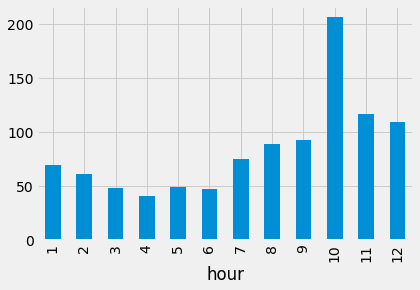

In [ ]:
#3 sleep cycle 
df['hour'] = df['date'].apply(lambda x: x.hour)
df.groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

# 4. Word Cloud

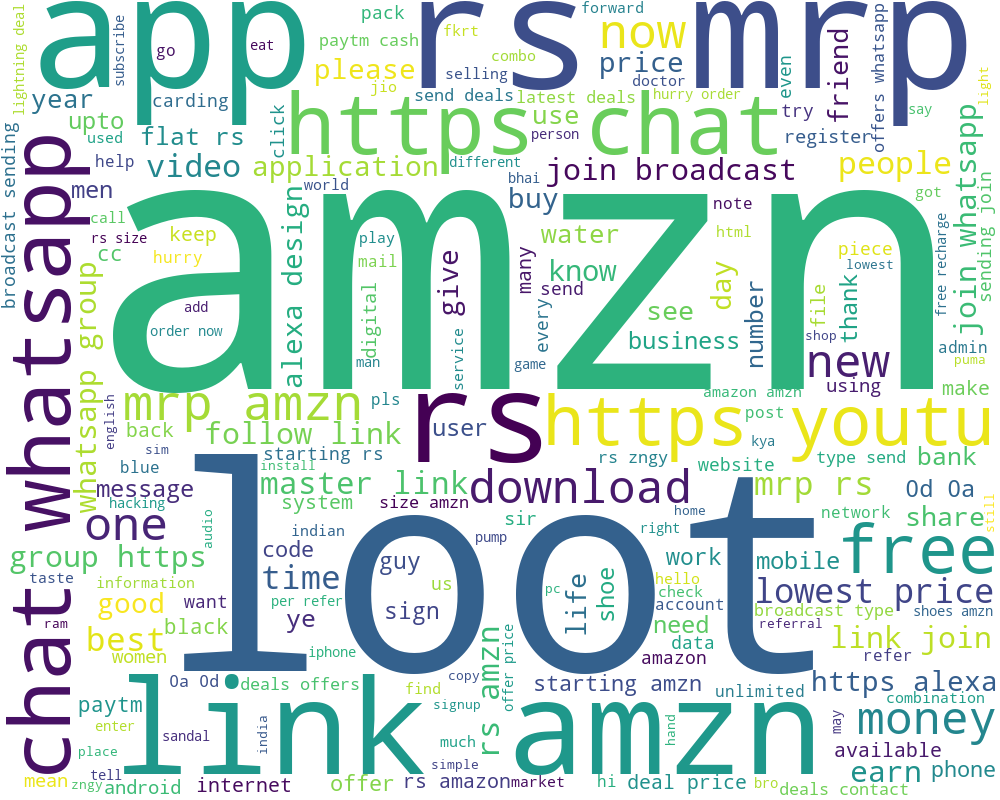

In [ ]:
from wordcloud import WordCloud, STOPWORDS
all_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
for msg in df['message'].values:
  words = str(msg).lower().split()
  for word in words:
    all_words = all_words + word + ' '

wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 


wordcloud.to_image()



```
### This is formatted as code
```

# 5.Cleaning data to be ready for emotional analysis

In [ ]:
# Create a function to clean the messages
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the messages
df['message'] = df['message'].apply(cleanTxt)

# Show the cleaned messages
df

,user,date,message,hour,Subjectivity,Polarity,Analysis
0,User 830,2004-09-17 06:32:00,??,6,0.000000,0.000000,Neutral
1,User 569,2004-09-17 06:43:00,*??LOOT @ 199 SHOES* MORE SHOES FROM 199,6,0.500000,0.500000,Positive
2,User 317,2004-09-17 06:44:00,Hahaaaha,6,0.000000,0.000000,Neutral
3,User 317,2004-09-17 06:56:00,_*Bags loot*_???? Starting at just *299* rs o...,6,0.633333,0.133333,Positive
4,User 404,2004-09-17 07:13:00,*??Lightning deal* 15 Watt Pack of 2 *At Rs ...,7,1.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
996,User 393,2004-03-17 10:31:00,Banade,10,0.000000,0.000000,Neutral
997,User 508,2004-03-17 10:31:00,Ddos to bta do yr aur Thoda zip bob ata h thod...,10,0.000000,0.000000,Neutral
998,User 393,2004-03-17 10:32:00,Pdf acha he dekh le,10,0.000000,0.000000,Neutral
999,User 489,2004-03-17 10:32:00,Hi,10,0.000000,0.000000,Neutral


Getting Subjectivity and polarity


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['message'].apply(getSubjectivity)
df['Polarity'] = df['message'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,user,date,message,hour,Subjectivity,Polarity,Analysis
0,User 830,2004-09-17 06:32:00,??,6,0.000000,0.000000,Neutral
1,User 569,2004-09-17 06:43:00,*??LOOT @ 199 SHOES* MORE SHOES FROM 199,6,0.500000,0.500000,Positive
2,User 317,2004-09-17 06:44:00,Hahaaaha,6,0.000000,0.000000,Neutral
3,User 317,2004-09-17 06:56:00,_*Bags loot*_???? Starting at just *299* rs o...,6,0.633333,0.133333,Positive
4,User 404,2004-09-17 07:13:00,*??Lightning deal* 15 Watt Pack of 2 *At Rs ...,7,1.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
996,User 393,2004-03-17 10:31:00,Banade,10,0.000000,0.000000,Neutral
997,User 508,2004-03-17 10:31:00,Ddos to bta do yr aur Thoda zip bob ata h thod...,10,0.000000,0.000000,Neutral
998,User 393,2004-03-17 10:32:00,Pdf acha he dekh le,10,0.000000,0.000000,Neutral
999,User 489,2004-03-17 10:32:00,Hi,10,0.000000,0.000000,Neutral


Calculating negative and positive messages

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,user,date,message,hour,Subjectivity,Polarity,Analysis
0,User 830,2004-09-17 06:32:00,??,6,0.000000,0.000000,Neutral
1,User 569,2004-09-17 06:43:00,*??LOOT @ 199 SHOES* MORE SHOES FROM 199,6,0.500000,0.500000,Positive
2,User 317,2004-09-17 06:44:00,Hahaaaha,6,0.000000,0.000000,Neutral
3,User 317,2004-09-17 06:56:00,_*Bags loot*_???? Starting at just *299* rs o...,6,0.633333,0.133333,Positive
4,User 404,2004-09-17 07:13:00,*??Lightning deal* 15 Watt Pack of 2 *At Rs ...,7,1.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
996,User 393,2004-03-17 10:31:00,Banade,10,0.000000,0.000000,Neutral
997,User 508,2004-03-17 10:31:00,Ddos to bta do yr aur Thoda zip bob ata h thod...,10,0.000000,0.000000,Neutral
998,User 393,2004-03-17 10:32:00,Pdf acha he dekh le,10,0.000000,0.000000,Neutral
999,User 489,2004-03-17 10:32:00,Hi,10,0.000000,0.000000,Neutral


Plotting the polarity and subjectivity

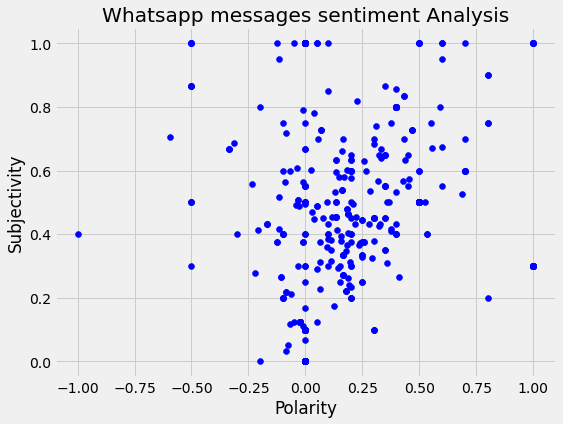

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Whatsapp messages sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

Percentages

In [ ]:
# Print the percentage of positive messages
pmessages = df[df.Analysis == 'Positive']
pmessages = pmessages['message']
pmessages
print("The percentage of positive messages is: ")
round( (pmessages.shape[0] / df.shape[0]) * 100 , 1)


The percentage of positive messages is: 


25.6

In [ ]:
# Print the percentage of negative messages
nmessages = df[df.Analysis == 'Negative']
nmessages = nmessages['message']
nmessages
print("the percentage of negative messages is:")
round( (nmessages.shape[0] / df.shape[0]) * 100, 1)

the percentage of negative messages is:


8.1

Some numbers

In [ ]:
# Showing some values
df['Analysis'].value_counts()

Neutral     664
Positive    256
Negative     81
Name: Analysis, dtype: int64

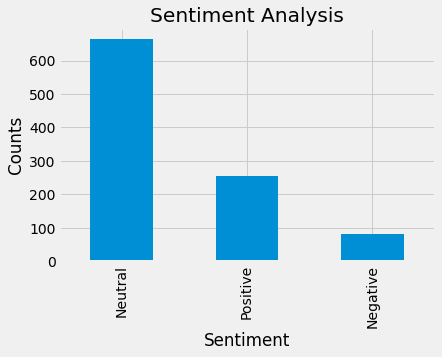

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()